In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import pandas as pd
import scipy as sp

### Uncomment below if you want to run on your modified code
#import sys
#sys.path.insert(sys.path.index('')+1, 'D:/Github/PyFENG')

import pyfeng as pf
import pyfeng.ex as pfex
np.set_printoptions(precision=6)

In [3]:
# This is the list of parameaters
pf.SabrHagan2002.init_benchmark() #.loc[sheets,]

,sigma,vov,rho,beta,texp,spot,col_name,Reference
Sheet,,,,,,,,
1,0.25,0.3000,-0.8000,0.3,10.00,1.00,IV MC,Table 1 in Antonov & Spector (2012). https://s...
2,0.25,0.3000,-0.8000,0.6,10.00,1.00,IV MC,Table 2 in Antonov & Spector (2012). https://s...
3,0.25,0.3000,-0.8000,0.9,10.00,1.00,IV MC,Table 3 in Antonov & Spector (2012). https://s...
4,0.25,0.3000,-0.5000,0.3,10.00,1.00,IV MC,Table 4 in Antonov & Spector (2012). https://s...
5,0.25,0.3000,-0.5000,0.6,10.00,1.00,IV MC,Table 5 in Antonov & Spector (2012). https://s...
6,0.25,0.3000,-0.5000,0.9,10.00,1.00,IV MC,Table 6 in Antonov & Spector (2012). https://s...
7,0.25,0.3000,-0.2000,0.3,10.00,1.00,IV MC,Table 7 in Antonov & Spector (2012). https://s...
8,0.25,0.3000,-0.2000,0.6,10.00,1.00,IV MC,Table 8 in Antonov & Spector (2012). https://s...
9,0.25,0.3000,-0.2000,0.9,10.00,1.00,IV MC,Table 9 in Antonov & Spector (2012). https://s...


# Simple Test

In [4]:
# Select sheet number from above
sheet_no = 22
m1, df, rv = pf.NsvhGaussQuad.init_benchmark(sheet_no)
m1.n_quad = (90,180)
p = m1.price(**rv['args_pricing'])
pd.DataFrame(np.round(p,8)).to_clipboard(index=False)

if rv['is_iv']:
    iv_ref = rv['val']
else:
    if m1.beta > 0:
        iv_ref = pf.Bsm(1).impvol(rv['val'], **rv['args_pricing'])
    else:
        iv_ref = pf.Norm(1).impvol(rv['val'], **rv['args_pricing'])        
print(m1.params_kw())

{'sigma': 0.68, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.3691, 'lam': 0.0, 'rho': -0.0286}


In [5]:
p

array([1.13918 , 1.110049, 1.053534, 0.999384, 0.947626, 0.898283,
       0.851324, 0.806763, 0.76456 , 0.724662, 0.687004, 0.668992])

In [6]:
np.round(p,4) - np.round(rv['val'],4)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
1-m1.cdf(**rv['args_pricing'])

array([0.588282, 0.576751, 0.553291, 0.529432, 0.505464, 0.481735,
       0.457637, 0.433826, 0.410479, 0.387724, 0.365678, 0.354953])

In [8]:
m1.delta_numeric(**rv['args_pricing'])

array([0.588356, 0.576839, 0.55339 , 0.529579, 0.505637, 0.481556,
       0.45756 , 0.433744, 0.410405, 0.387661, 0.365624, 0.354902])

# Table 2, 3, 4
* Table 2 (Case 1): `sheet_no=30`
* Table 3 (Case 2): `sheet_no=31`
* Table 4 (Case 3): `sheet_no=32`

In [9]:
def p_cdf_df(sheet_no):
    m, df, rv = pf.NsvhGaussQuad.init_benchmark(sheet_no)

    m.n_quad = (5,5)
    p5 = m.price(**rv['args_pricing'])
    d5 = 1-m.cdf(**rv['args_pricing'])

    m.n_quad = (7,7)
    p7 = m.price(**rv['args_pricing'])
    d7 = 1-m.cdf(**rv['args_pricing'])

    m.n_quad = (10,10)
    p10 = m.price(**rv['args_pricing'])
    d10 = 1-m.cdf(**rv['args_pricing'])

    m.n_quad = (14,14)
    p14 = m.price(**rv['args_pricing'])
    d14 = 1-m.cdf(**rv['args_pricing'])
    
    m.n_quad = (90,180)
    p90 = m.price(**rv['args_pricing'])
    d90 = 1-m.cdf(**rv['args_pricing'])

    m0, df, rv = pf.SabrNormVolApprox.init_benchmark(sheet_no)
    p_hag0 = m0.price(**rv['args_pricing'])
    d_hag0 = m0.delta_numeric(**rv['args_pricing'])

    #print(p90 - np.round(rv['val'],5))

    df = pd.DataFrame({
        'Strike':rv['args_pricing']['strike'], 
        'p 5x5 Err': p5 - p90, 'p 7x7 Err': p7 - p90, 'p 10x10 Err': p10 - p90, 'p 14x14 Err': p14 - p90,
        'p Hagan': p_hag0 - p90, 'p 90x180': p90, 'p Ref': rv['val'],
        'd 5x5 Err': d5 - d90, 'd 7x7 Err': d7 - d90, 'd 10x10 Err': d10 - d90, 'd 14x14 Err': d14 - d90,
        'd Hagan': d_hag0 - d90, 'd 90x180': d90})
    return df

In [10]:
df1 = p_cdf_df(30)
df2 = p_cdf_df(31)
df3 = p_cdf_df(32)

In [11]:
df3  # Table 4

,Strike,p 5x5 Err,p 7x7 Err,p 10x10 Err,p 14x14 Err,p Hagan,p 90x180,p Ref,d 5x5 Err,d 7x7 Err,d 10x10 Err,d 14x14 Err,d Hagan,d 90x180
0,0.0,-0.196010,-0.038547,0.041163,0.029635,72.667939,569.447800,569.447800,-0.001447,-0.000308,-0.000905,-0.000708,0.169941,0.891978
1,100.0,-0.110631,-0.042261,0.125199,0.012019,54.556059,481.519899,481.519899,-0.003029,-0.001315,-0.000425,-0.000439,0.193011,0.864689
2,200.0,0.095705,0.041662,0.143811,0.062147,33.955532,397.027964,397.027964,-0.004715,-0.002497,-0.000301,-0.000218,0.219183,0.821570
3,300.0,0.253620,0.125687,0.128382,0.058376,10.929260,318.228180,318.228180,-0.005643,-0.003285,-0.000933,-0.000583,0.238017,0.747176
4,350.0,0.144386,0.046353,0.142916,0.066513,-0.909766,282.240986,282.240986,-0.005444,-0.003171,-0.001763,-0.001104,0.232649,0.689348
5,400.0,0.597761,0.304354,0.183574,0.088838,-11.930885,249.614694,249.614694,-0.006046,-0.003855,-0.002964,-0.001908,0.203165,0.612264
6,500.0,0.791867,0.403996,0.216800,0.111907,-25.705772,198.020488,198.020488,0.009048,0.006734,0.004831,0.003315,0.059656,0.415659
7,600.0,0.413931,0.139436,0.048013,0.015142,-25.134858,165.130689,165.130689,0.005406,0.003270,0.001904,0.001109,-0.053645,0.255574
8,700.0,0.265320,0.072018,0.023209,0.006326,-17.856356,144.451013,144.451013,0.003231,0.001849,0.000994,0.000588,-0.083224,0.167428


In [12]:
if False:
    with pd.ExcelWriter(f'../Latex-NormQuad/Result2.xlsx') as writer:  
        df1.to_excel(writer, index=False, sheet_name='Case1')
        df2.to_excel(writer, index=False, sheet_name='Case2')
        df3.to_excel(writer, index=False, sheet_name='Case3')

# Figure 1

In [13]:
def vol_cdf_plot(sheet_no, save=False):
    case_no = sheet_no - 29
    
    m, df, rv = pf.NsvhGaussQuad.init_benchmark(sheet_no)
    m0, df, rv = pf.SabrNormVolApprox.init_benchmark(sheet_no)
    args_pricing = rv['args_pricing']
    args_pricing['strike'] = strike = args_pricing['spot'] + np.arange(-350,351,10)
    
    vol_list = []
    delta_list = []

    vol_list.append(m.vol_smile(**args_pricing))
    delta_list.append(1-m.cdf(**args_pricing))

    m.n_quad = (90,180)
    vol_list.append(m.vol_smile(**args_pricing))
    delta_list.append(1-m.cdf(**args_pricing))

    vol_list.append(m0.vol_smile(**args_pricing))
    delta_list.append(1-m0.cdf_numeric(**args_pricing))

    plt.figure()
    #plt.subplot(121)
    plt.plot(strike, vol_list[0], "b-")
    plt.plot(strike, vol_list[2], linestyle="--", color="r")
    plt.plot(strike[::5], vol_list[1][::5], "kx")
    plt.title(f'Case {case_no}', fontsize=14)
    plt.ylabel('Implied normal volatility ( $\\sigma_N$ )', fontsize=12)
    plt.xlabel('Strike price ( $K$ )', fontsize=12)
    plt.legend(['Quad (7x7)', 'Hagan', 'Exact'])
    plt.grid(linestyle="--")
    if save:
        plt.savefig(f'../Latex-NormQuad/images/Case{case_no}-vol.pdf', bbox_inches='tight')
        plt.savefig(f'../Latex-NormQuad/images/Case{case_no}-vol.png', bbox_inches='tight')
    plt.show()
    
    plt.figure()
    #plt.subplot(122)
    plt.plot(strike, delta_list[0]*100, "b-")
    plt.plot(strike, delta_list[2]*100, linestyle="--", color="r")
    plt.plot(strike[::5], delta_list[1][::5]*100, "kx")
    plt.title(f'Case {case_no}', fontsize=14)
    plt.ylabel('Delta (%)', fontsize=12)
    plt.xlabel('Strike price ( $K$ )', fontsize=12)
    plt.legend(['Quad (7x7)', 'Hagan', 'Exact'])
    plt.grid(linestyle="--")
    if save:
        plt.savefig(f'../Latex-NormQuad/images/Case{case_no}-delta.pdf', bbox_inches='tight')
        plt.savefig(f'../Latex-NormQuad/images/Case{case_no}-delta.png', bbox_inches='tight')
    plt.show()

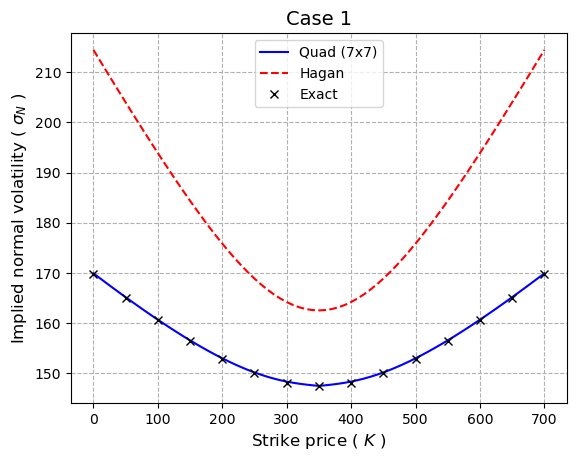

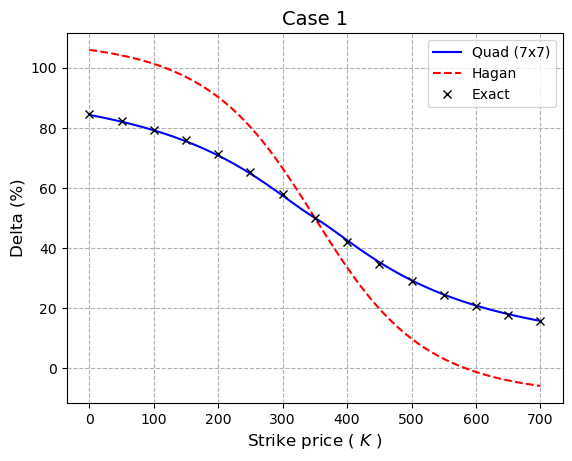

In [14]:
vol_cdf_plot(30, save=False)

# Sanity Check
## NSVh1 Model

In [15]:
no = 32
m, df, rv = pf.NsvhGaussQuad.init_benchmark(no)
m.lam = 1.0
m.n_quad = (90,180)
m0, *_ = pf.Nsvh1.init_benchmark(no)
m.sigma=m0.sigma=6

In [16]:
p0 = m0.price(**rv['args_pricing'])
p1 = m.price(**rv['args_pricing'])
m.vol_smile(**rv['args_pricing'])

array([217.480801, 201.759711, 185.383455, 168.205298, 159.256549,
       150.029314, 130.625312, 110.213415, 102.380519])

In [17]:
p1 - p0, p0

(array([ 3.114085e-04,  1.535071e-03,  9.431827e-04, -8.354684e-04,
        -5.673649e-04,  2.132453e-04, -1.078947e-04, -2.079962e-05,
         7.181455e-10]),
 array([670.583246, 577.096559, 484.491931, 393.086848, 347.991553,
        303.435035, 216.679181, 136.188961,  90.925068]))

In [18]:
c0 = 1 - m0.cdf(**rv['args_pricing'])
c1 = 1 - m.cdf(**rv['args_pricing'])

In [19]:
c0 - c1, c0

(array([ 1.966595e-05,  9.329801e-06, -2.806139e-05, -4.856279e-06,
         1.386349e-05,  1.868014e-05, -1.674263e-05, -5.829636e-06,
        -1.046819e-05]),
 array([0.93854 , 0.930865, 0.920716, 0.90651 , 0.896948, 0.88479 ,
        0.845843, 0.741378, 0.143404]))